<a href="https://colab.research.google.com/github/Shafaqulhamim/billcalculator/blob/master/Star_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()


Saving Stars.csv to Stars.csv


In [3]:
df = pd.read_csv('Stars.csv')

In [4]:
types = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants']

In [5]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [6]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [7]:
df.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [8]:
import numpy as np

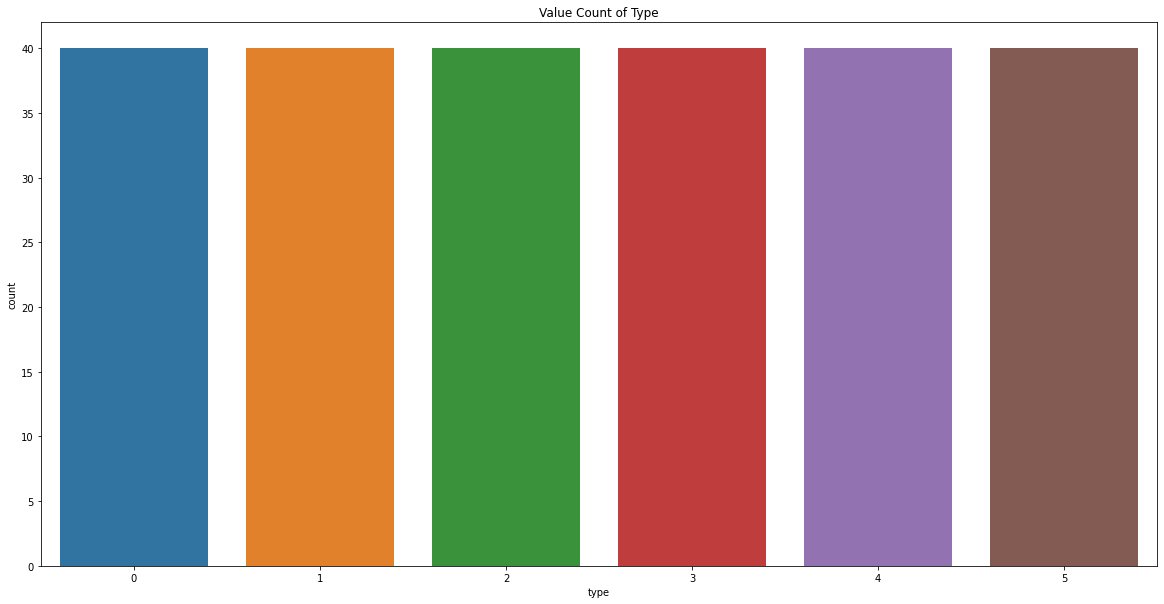

In [11]:
plt.figure(figsize=(20,10))
plt.title('Value Count of Type')
sns.countplot(data=df, x='type');

In [10]:
df.columns = [c.lower() for c in df.columns]

In [12]:
log_cols = ['temperature', 'l', 'r']

In [13]:
for c in log_cols:
    df[c+'_log'] = np.log10(df[c])

In [14]:
df['color'] = df['color'].str.replace('-', ' ').str.replace('ish','').str.replace('Pale ','').str.title()
df['color'] = df['color'].replace('Whit', 'White')
df['color'] = df['color'].replace('White Yellow', 'Yellow White')

In [15]:
df['color'].unique()

array(['Red', 'Blue White', 'White', 'Yellow White', 'Yellow Orange',
       'Blue', 'Orange', 'Yellow', 'Orange Red'], dtype=object)

In [16]:
color_order = ['Red', 'Orange Red', 'Orange', 'Yellow Orange', 'Yellow','Yellow White','White','Blue White', 'Blue']

In [17]:
df['color_value'] = df['color'].apply(lambda x: color_order.index(x))

In [18]:
df['spectral_class_value'] = df['spectral_class'].apply(lambda x: list(df['spectral_class'].unique()).index(x))

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from IPython.display import Image

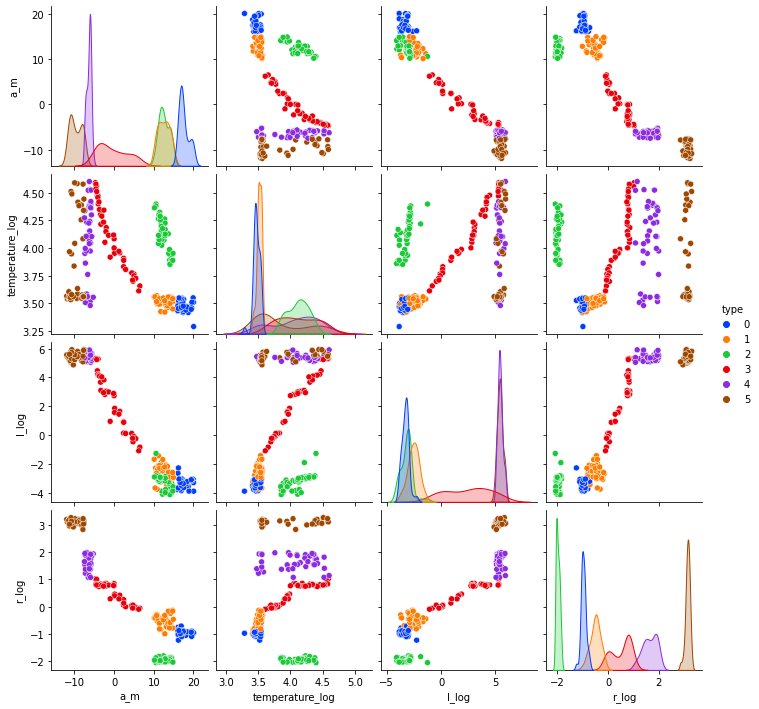

In [20]:
drop_cols = log_cols.copy()
drop_cols.extend(['color_value', 'spectral_class_value']) # I currently don't want to see categorical df
sns.pairplot(df.drop(drop_cols, axis=1), hue='type', palette='bright')

In [21]:
X = df.drop('type', axis = 1)
X = pd.get_dummies(X, drop_first = True)
y = df['type']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier

In [26]:
from warnings import filterwarnings

In [27]:
filterwarnings('ignore')

In [28]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [29]:
models = {'LogisticRegression': LogisticRegression(max_iter=3000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'XGBClassifier': XGBClassifier(),
          'XGBRFClassifier': XGBRFClassifier(),
          'LGBMClassifier':LGBMClassifier()}

In [30]:
baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [31]:
baseline_model_scores

,Score
AdaBoostClassifier,0.680556
KNeighborsClassifier,0.958333
SVC,0.958333
LogisticRegression,0.986111
DecisionTreeClassifier,0.986111
RandomForestClassifier,0.986111
GradientBoostingClassifier,1.000000
XGBClassifier,1.000000
XGBRFClassifier,1.000000
LGBMClassifier,1.000000


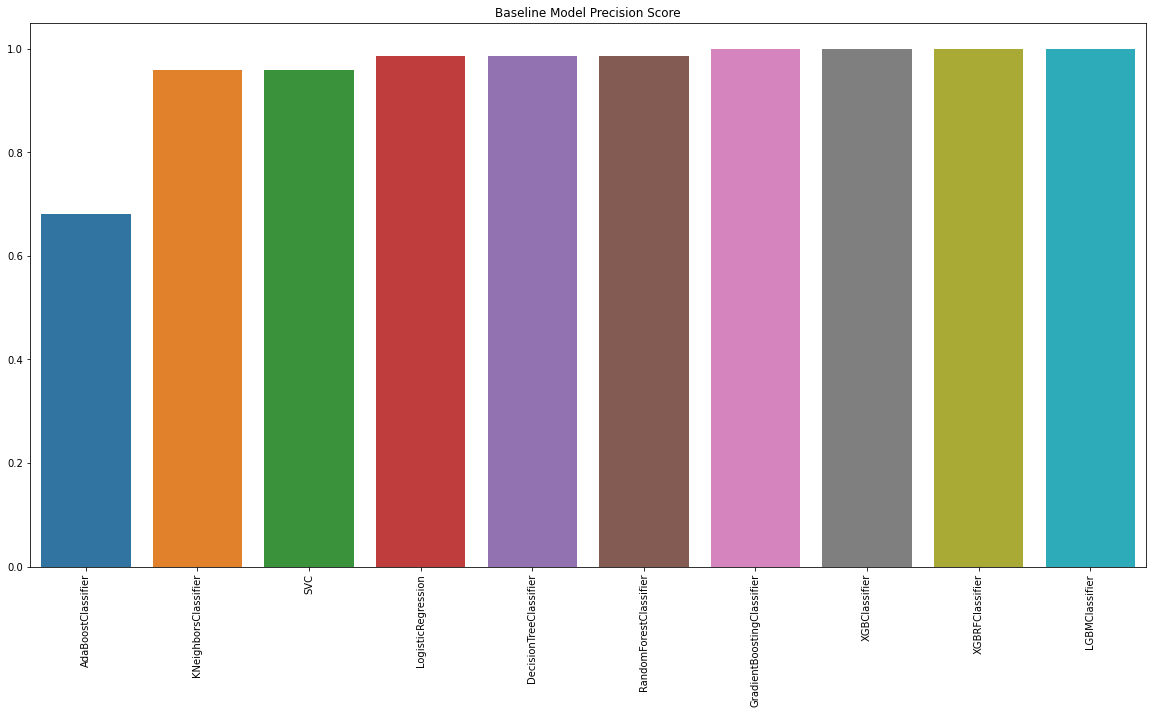

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(data=baseline_model_scores.sort_values('Score').T)
plt.title('Baseline Model Precision Score')
plt.xticks(rotation=90);

In [33]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import cross_val_score

In [34]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [35]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.00      0.00      0.00        12
           2       1.00      1.00      1.00        10
           3       0.30      1.00      0.47        10
           4       0.00      0.00      0.00        11
           5       1.00      1.00      1.00        15

    accuracy                           0.68        72
   macro avg       0.55      0.67      0.58        72
weighted avg       0.58      0.68      0.61        72



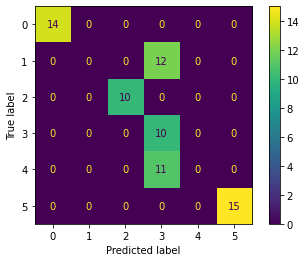

In [36]:
plot_confusion_matrix(model,X_test,y_test)

In [85]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [86]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        10
           3       0.91      1.00      0.95        10
           4       0.91      0.91      0.91        11
           5       1.00      0.93      0.97        15

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



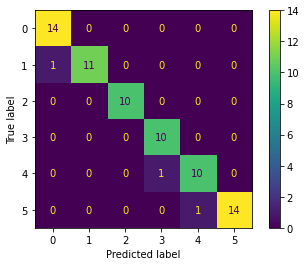

In [87]:
plot_confusion_matrix(model,X_test,y_test)

In [88]:
model = SVC()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [89]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        10
           3       1.00      0.80      0.89        10
           4       0.92      1.00      0.96        11
           5       0.94      1.00      0.97        15

    accuracy                           0.96        72
   macro avg       0.96      0.95      0.96        72
weighted avg       0.96      0.96      0.96        72



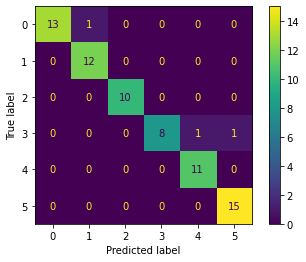

In [90]:
plot_confusion_matrix(model,X_test,y_test)

In [91]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [92]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



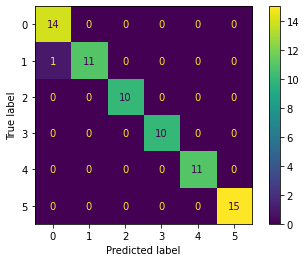

In [93]:
plot_confusion_matrix(model,X_test,y_test)

In [94]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [95]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



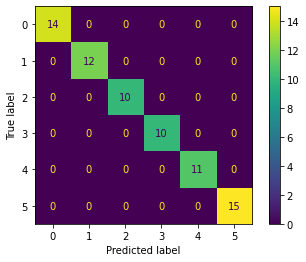

In [96]:
plot_confusion_matrix(model,X_test,y_test)

In [99]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [100]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



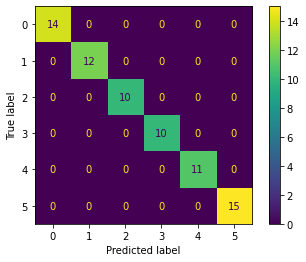

In [101]:
plot_confusion_matrix(model,X_test,y_test)

In [102]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [103]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



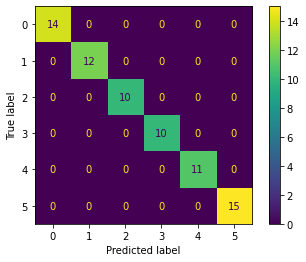

In [104]:
plot_confusion_matrix(model,X_test,y_test)

In [105]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [106]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



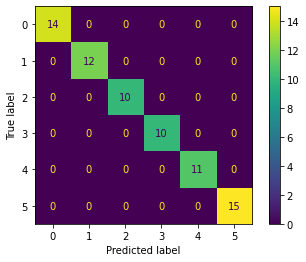

In [107]:
plot_confusion_matrix(model,X_test,y_test)

In [108]:
model = XGBRFClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [109]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



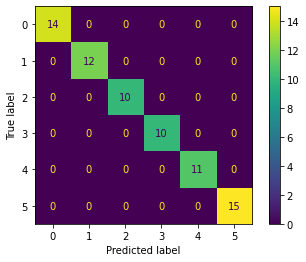

In [110]:
plot_confusion_matrix(model,X_test,y_test)

In [111]:
model = LGBMClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [113]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



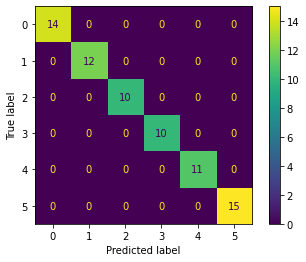

In [114]:
plot_confusion_matrix(model,X_test,y_test)

Here we see that so many algoritms give very good accuracy. So, when we need to choose one algorithm among these, we choose DecisionTreeClassifier as our Strar Type Classifier beacuse of its high accuracy and simplicity.

In [115]:
model=DecisionTreeClassifier() 
def get_cv_score(model, X, y, cv=5):
    
    np.random.seed(42)
    cv_accuracy = cross_val_score(model,X,y,cv=cv,
                         scoring='accuracy')
    print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
    print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')
      
    
    cv_merics = pd.DataFrame({'Accuracy': cv_accuracy.mean()},index=[0])
    
    return cv_merics

Cross Validation Score of Decision Tree Classifier.

In [117]:
cv_merics = get_cv_score(model, X_train, y_train, cv=10)

Cross Validaion accuracy Scores: [1.         1.         0.94117647 1.         1.         1.
 1.         1.         0.9375     1.        ]
Cross Validation accuracy Mean Score: 0.9878676470588236


In [118]:
cv_merics

,Accuracy
0,0.987868


In [120]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

Feature Importance

In [125]:
from matplotlib import pyplot
importance = model.feature_importances_

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.40833
Feature: 3, Score: 0.38475
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.20692
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000


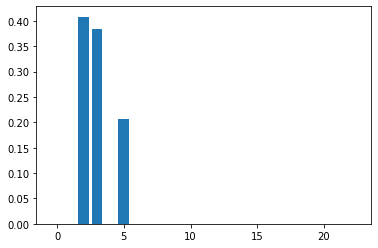

In [126]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()